In [2]:
import pandas as pd
import numpy as np

matplotlib.style.use('ggplot')
%matplotlib inline

NameError: name 'matplotlib' is not defined

In [3]:
df = pd.read_csv('dump.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13364 entries, 0 to 13363
Data columns (total 7 columns):
Mode         13364 non-null object
Node         13364 non-null object
Rank         13364 non-null int64
Timestep     13364 non-null int64
Operation    13364 non-null object
Value        13364 non-null float64
Executed     9593 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 835.2+ KB


In [4]:
outer = df[(df['Rank']==0) & (df['Operation']=='outer')].sort_values('Timestep')

In [5]:
print outer.head()

        Mode   Node  Rank  Timestep Operation     Value  Executed
5975   TIMER  cn111     0         1     outer  0.099609         1
12744  TIMER  cn111     0         2     outer  0.159380         1
12684  TIMER  cn111     0         3     outer  0.134620         1
12165  TIMER  cn111     0         4     outer  0.125264         1
9594   TIMER  cn111     0         5     outer  0.125711         1


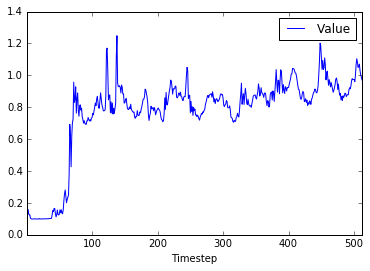

In [6]:
outer.plot(x='Timestep', y='Value')

In [7]:
df['Value'][df['Operation'] == 'interp_fail'].count()
df['Value'][df['Operation'] == 'interp_succeed'].count()
df.groupby('Operation')['Value'].sum()

Operation
fs_eval                12.659016
fs_insert             329.152585
interp_fail       1654122.000000
interp_succeed    1224302.000000
interpolate           571.123462
outer                1573.863603
second_interp         136.132076
Name: Value, dtype: float64

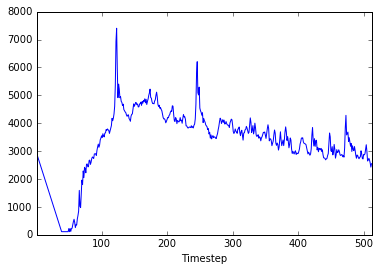

In [8]:
i_fail = df[df['Operation'] == 'interp_fail'].groupby('Timestep')['Value'].sum()
i_fail.plot()

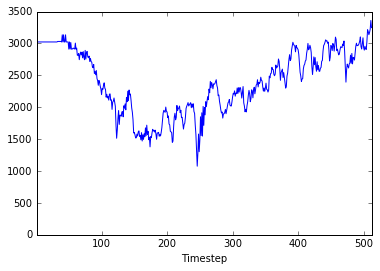

In [9]:
df[df['Operation'] == 'interp_succeed'].groupby('Timestep')['Value'].sum().plot()